In [1]:
import os
import pickle
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt


pathDICT = {
    "debug_Path" : "/Users/pk695/werk.M2/FACTS_dev/2401_RFF.SPs/facts_development/facts/experiments.RFF.SPs/debug_rffLL_project",   
}



file=f"{pathDICT['debug_Path']}/project.pkl"

with open(file, "rb") as f:
    loaded_data = pickle.load(f)

# Access each variable
rffemfull_array     = loaded_data["rffemfull_array"]
rff_sp_array        = loaded_data["rff_sp_array"]
#
temps               = loaded_data["temps"]
deeptemps           = loaded_data["deeptemps"]
ohcs                = loaded_data["ohcs"]


del file, f
file=f"{pathDICT['debug_Path']}/rff.LL.temperature.fair.rffLL_preprocess.pkl"
with open(file, 'rb') as f:
	preprocess_data = pickle.load(f)

emis	 			= preprocess_data["emis"]
rffemissions	 	= preprocess_data["rffemissions"]
REFERENCE_YEAR 	    = preprocess_data["REFERENCE_YEAR"]
t 					= np.arange(REFERENCE_YEAR, 2501)

# pairds 			    = preprocess_data["pairds"]
# scenario 		    = preprocess_data["scenario"]
# rcmip_file 		    = preprocess_data["rcmip_file"]





# print('\n <======>')
# print('rffemissions = ',rffemissions)
# print('<======>')
# print('emis shape:: ',emis.shape)
# print('<======>')
# print(f"rffemfull_array shape:: {rffemfull_array.shape}")
# print('<======>')



rffemissionsGASIDX={
    "C": 0,
    "CH4": 1,
    "N2": 2 }

emisGASIDX={
    "C": 1,
    "CH4": 3,
    "N2O": 4,
    "N2": 4 }

/var/folders/gp/3_y9nhmx1_q9m81jy_j7f8ddyrdbs6/T/ipykernel_16087/1011217181.py:31: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  preprocess_data = pickle.load(f)


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

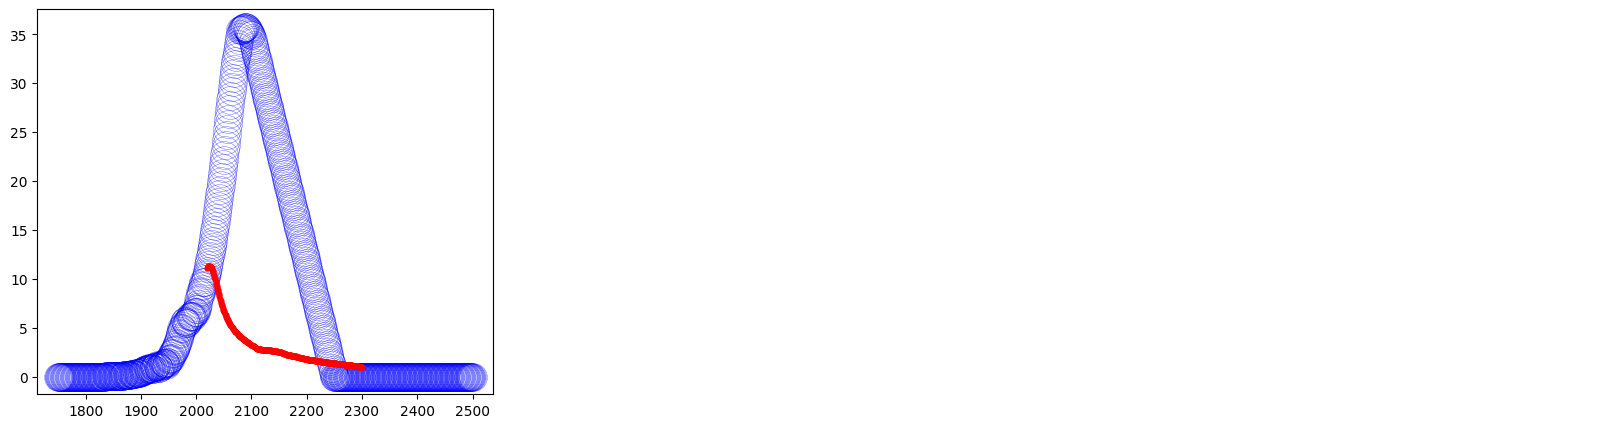

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
#
# emis -->
# axs[0].plot(emis[:,0] , emis[:,emisGASIDX["C"]],'ob',label='C- base', mfc='none', mew=.2, ms=20)
axs[0].plot(emis[:,0] , emis[:,1],'ob',label='C- base', mfc='none', mew=.2, ms=20)
axs[0].plot(rffemissions.Year.values, rffemissions.sel(gas='C',rff_sp=2637).emissions.values, '.r',label='C- rff', mfc='none', mew=2, ms=5)
#
axs[1].axis('off')
axs[2].axis('off')

In [3]:
emis1=emis

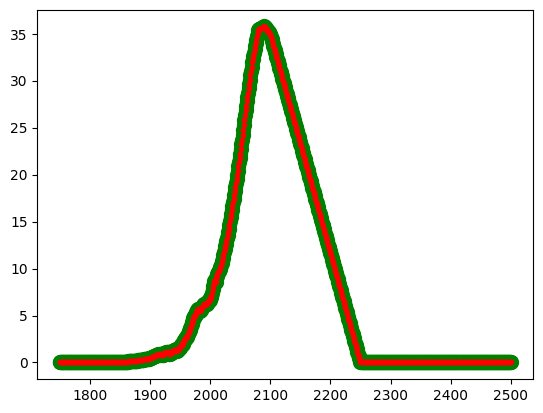

In [4]:
plt.plot(emis[:,0] , emis[:,1],'.g',ms=20) 
plt.plot(emis1[:,0] , emis1[:,1], '.r')

In [5]:
# Prep the RFF emissions
def prep_rff(emis_base, emis_rffsp, rff_sp_idx,reference_year):
    
    # maps GHG gas to index in emissions numpy array
    idxdt = {
        "C": 1,
        "CH4": 3,
        "N2O": 4,
        "N2": 4,
    }
    styear = emis_rffsp.Year.values[0]
    enyear = emis_rffsp.Year.values[-1]

    # put the RFF-SP gases into the given background emissions 
    emis_rffsp_full  = emis_base.copy()
    emis_rffsp_og    = emis_base.copy()

    for GAS in emis_rffsp.gas.values:
        
        emis_rffsp_full[styear-reference_year:enyear-reference_year+1,idxdt[GAS]] = emis_rffsp.sel(gas=GAS,rff_sp=rff_sp_idx).emissions.values
        # emis_rffsp_full[styear-reference_year:enyear-reference_year+1,idxdt[GAS]] = np.zeros(551 - 270)

    return emis_rffsp_full, emis_rffsp_og

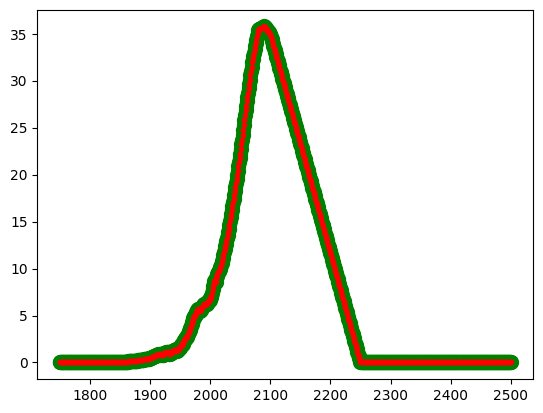

In [6]:
plt.plot(emis[:,0] , emis[:,1],'.g',ms=20) 
plt.plot(emis1[:,0] , emis1[:,1], '.r')

In [7]:
rffspIDX=9999
emis_rffsp_full1, emis_rffsp_og1 = prep_rff(emis, rffemissions, rffspIDX, REFERENCE_YEAR)

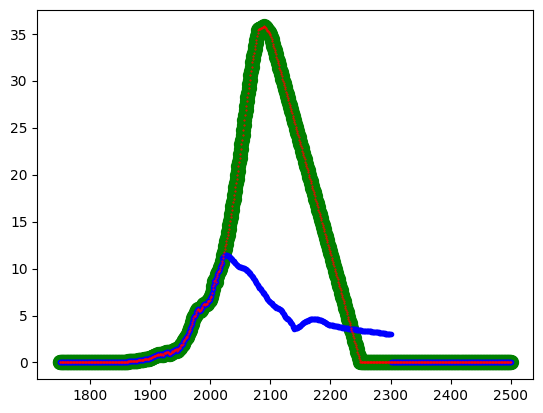

In [9]:
plt.plot(emis[:,0] , emis[:,1],'.g',ms=20) 
plt.plot(emis_rffsp_full1[:,0] , emis_rffsp_full1[:,1], '.b')
plt.plot(emis_rffsp_og1[:,0] , emis_rffsp_og1[:,1], '.r', ms=1)

The reason we are seeing this is because of mutable object behavior in Python. `emis_rffsp_full = emis_base` creates a new reference to the same object as `emis_base`. Any modification to `emis_rffsp_full` will directly alter `emis_base`, as they are both pointing to the same underlying array.

In Python, when one variable is assigned to another (e.g., `emis_rffsp_full = emis_base`), you are not creating a new independent copy of the object. Instead, both variables point to the same memory location.

So, when you modify `emis_rffsp_full` in your function, `emis_base` is also modified because they share the same reference.

In [ ]:
file=f"{pathDICT['debug_Path']}/rff.LL.temperature.fair.rffLL_preprocess.pkl"
with open(file, 'rb') as f:
	preprocess_data = pickle.load(f)

emis	 			= preprocess_data["emis"]

emis= preprocess_data["emis"]
plt.plot(emis[:,0], emis[:,1], '.')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# ===========> PLOT emis
ax0=axs[0]
# emis -->
ax0.plot(emis[:,0] , emis[:,1],'ob',label='C- base', mfc='none', mew=.2, ms=20);
ax0.plot(emis1[:,0] , emis1[:,1],'.r',label='C- base', mfc='none', mew=.2, ms=2);

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# ===========> PLOT emis
ax0=axs[0]
# emis -->
ax0.plot(rffem_base1[:,0] , rffem_base1[:,1],'.b',label='C- base', mfc='none', mew=2, ms=2);
ax0.plot(rffem_full1[:,0] , rffem_full1[:,1],'og',label='C- base', mfc='none', mew=.2, ms=20);